# Introduction

Notebook to analyze the overmortality in the last 3 years in France Data has been downloaded from INSEE from this page https://www.insee.fr/fr/statistiques/4487988?sommaire=4487854#consulter-sommaire The point is to go a little more in detail with respect with the analysis here : https://www.insee.fr/fr/statistiques/4931039?sommaire=4487854#graphique-figure1

## Environment setup
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

In [2]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
palette = sns.color_palette("tab10",4);

In [3]:
# Date formatting
from matplotlib.dates import DateFormatter
import datetime as dt

## Load data

### Detailed daily data from 2018 to 2021

Optimize dtypes when reading data to optimize memory usage. Pandas specific dtypes are used for columns that can contain missing values. Missing values are by default cast to Nan which is of type float so any integer column containing a missing value is automatically cast to float otherwise. 

In [4]:
data_2018 = pd.read_csv('DC_2018_det.csv', sep=';', encoding='latin-1', usecols=[0,1,2,5,6,7,8],
                        dtype={'ADEC':np.uint16,'MDEC':np.uint8,'JDEC':np.uint8,
                               'ANAIS':np.uint16, 'MNAIS':pd.Int16Dtype(),'JNAIS':pd.Int16Dtype(),
                               'SEXE':str})

In [5]:
df_missing = pd.DataFrame({'Nb_miss':data_2018.isna().sum()})
df_missing['P_miss'] = df_missing.Nb_miss/data_2018.shape[0]
df_missing['N'] = data_2018.agg('count')
df_missing['N_unique'] = data_2018.agg('nunique')

In [6]:
df_missing

,Nb_miss,P_miss,N,N_unique
ADEC,0,0.000000,609937,1
MDEC,0,0.000000,609937,12
JDEC,0,0.000000,609937,31
ANAIS,0,0.000000,609937,115
MNAIS,2970,0.004869,606967,12
JNAIS,4208,0.006899,605729,31
SEXE,0,0.000000,609937,2


In [7]:
data_2018.fillna(1, inplace=True);

In [8]:
data_2018.head()

,ADEC,MDEC,JDEC,ANAIS,MNAIS,JNAIS,SEXE
0,2018,1,1,1925,10,20,F
1,2018,1,1,1945,5,29,M
2,2018,1,1,1963,7,6,M
3,2018,1,1,1925,4,5,M
4,2018,1,1,1929,10,22,F


In [9]:
data_2019 = pd.read_csv('DC_2019_det.csv', sep=';', encoding='latin-1', usecols=[0,1,2,5,6,7,8],
                        dtype={'ADEC':np.uint16,'MDEC':np.uint8,'JDEC':np.uint8,
                               'ANAIS':np.uint16, 'MNAIS':pd.Int16Dtype(),'JNAIS':pd.Int16Dtype(),
                               'SEXE':str})

In [10]:
data_2019.fillna(1, inplace=True);

In [11]:
data_2020 = pd.read_csv('DC_20202021_det.csv', sep=';', encoding='latin-1', usecols=[0,1,2,5,6,7,8],
                        dtype={'ADEC':np.uint16,'MDEC':np.uint8,'JDEC':np.uint8,
                               'ANAIS':np.uint16, 'MNAIS':pd.Int16Dtype(),'JNAIS':pd.Int16Dtype(),
                               'SEXE':str})

In [12]:
data_2020.fillna(1, inplace=True);

In [13]:
data_all = pd.concat([data_2018,data_2019,data_2020])

In [14]:
del data_2018, data_2019, data_2020

In [15]:
# The date of birth for 2 records is missing the day and the month info, we set it to 1st of January
data_all.loc[data_all.JNAIS == 0,'JNAIS'] =1
data_all.loc[data_all.MNAIS == 0,'MNAIS'] =1

In [16]:
df = data_all[['ADEC','MDEC','JDEC']]
df.columns = ['year','month','day']

In [17]:
data_all['Date'] = pd.to_datetime(df)

In [18]:
df = data_all[['ANAIS','MNAIS','JNAIS']]
df.columns = ['year','month','day']

In [19]:
data_all['Birth'] = pd.to_datetime(df)

In [19]:
del df 

In [30]:
print("Date range in the data " + min(data_all.Date).strftime('%d-%m-%Y') + " to " + max(data_all.Date).strftime('%d-%m-%Y'))

Date range in the data 01-01-2018 to 06-12-2021


In [23]:
data_all.shape

(2499008, 9)

### Split data by age and age groups

In [31]:
data_all['Age'] = (data_all.Date - data_all.Birth)//np.timedelta64(1,'Y')

In [32]:
data_all['Group'] = ""

In [33]:
data_all.loc[data_all.Age <= 24,'Group'] = "0_24ans"
data_all.loc[(data_all.Age > 24) & (data_all.Age <= 49),'Group'] = "25_49ans"
data_all.loc[(data_all.Age > 49) & (data_all.Age <= 64),'Group'] = "50_64ans"
data_all.loc[(data_all.Age > 64) & (data_all.Age <= 74),'Group'] = "65_74ans"
data_all.loc[(data_all.Age > 74) & (data_all.Age <= 84),'Group'] = "75_84ans"
data_all.loc[data_all.Age > 84,'Group' ] = "84ans_plus"

In [34]:
data_all.head()

,ADEC,MDEC,JDEC,ANAIS,MNAIS,JNAIS,SEXE,Date,Birth,Age,Group
0,2018,1,1,1925,10,20,F,2018-01-01,1925-10-20,92,84ans_plus
1,2018,1,1,1945,5,29,M,2018-01-01,1945-05-29,72,65_74ans
2,2018,1,1,1963,7,6,M,2018-01-01,1963-07-06,54,50_64ans
3,2018,1,1,1925,4,5,M,2018-01-01,1925-04-05,92,84ans_plus
4,2018,1,1,1929,10,22,F,2018-01-01,1929-10-22,88,84ans_plus


# Yearly data comparaison

In [35]:
data = data_all.groupby(['Date','ADEC']).agg(Count = ('Date' , 'count'))

In [36]:
data.reset_index(inplace=True)

In [37]:
data.columns = ["Date","Year","Daily death count"]

In [38]:
data.head()

,Date,Year,Daily death count
0,2018-01-01,2018,2002
1,2018-01-02,2018,2111
2,2018-01-03,2018,2114
3,2018-01-04,2018,2134
4,2018-01-05,2018,2070


In [39]:
df = pd.DataFrame({'day': data.Date.dt.day, 'month' : data.Date.dt.month})
df['year'] = 1972  # added dummy year in the plot date so that the curves can overlap

In [40]:
data['Plot Date [dd-mm]'] = pd.to_datetime(df)

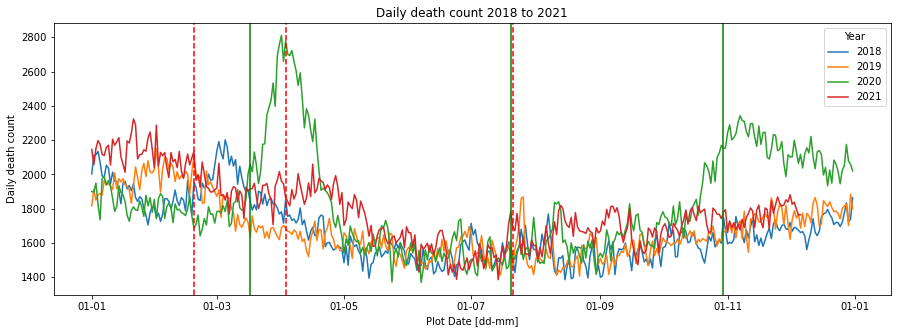

In [41]:
plt.figure(figsize=(15,5));
ax = sns.lineplot(data=data, x = 'Plot Date [dd-mm]',y = 'Daily death count', hue='Year', palette=palette );
ax.set_title("Daily death count 2018 to 2021")
ax.xaxis.set_major_formatter(DateFormatter("%d-%m"));
plt.axvline(dt.datetime(1972,3,17), color='green'); # 1st confinement
plt.axvline(dt.datetime(1972,7,20), color='green'); # mandatory mask inside
plt.axvline(dt.datetime(1972,10,30), color='green'); # 2nd confinement
plt.axvline(dt.datetime(1972,2,19), color='red', linestyle='dashed'); # vaccine for everyone
plt.axvline(dt.datetime(1972,4,3), color='red', linestyle='dashed'); # 3rd confinement
plt.axvline(dt.datetime(1972,7,21), color='red', linestyle='dashed'); # health pass

* At the begining of 2020 mortality is low with respect to 2019 but similar to the mortality in 2018

* In 2020 the effect of the first COVID wave starting in March 2020 is clearly visible on the plot. After 6 weeks of strict confinment starting from mid March 2020, the daily deaths reach a similar level to 2019 and 2018 

* Mid-october 2020 marks the begining of the Delta wave which is contained by the new restrictions on bars and restaurants starting at the end of october and by the opening of the vaccination campaign for people over 75 (65) in mid-december.

* beginning of 2021 is marked by an overall higher mortality, which lasts more than the seasonal flu epidemic wave that can be seen in february 2019 for instance, in parallel with the acceleration of the vaccination campaign

* mortality goes back to usual level in mid mai 2021 but starts to increase again during the summer in spite of the larger vaccination coverage. At this point the government decides to introduce the green pass in order to increase the vaccination coverage

* starting from september 2021 the mortality maintains at a steady level, new high picks no longer appear inspite of the overall circulation of the virus

* in december the Omicron variant is identified in conjunction with the fact that the first people to get vaccinated are starting to loose the immunity from their first 2 shots. The government decides to make available a 3rd shot to people over 65 befor 15 december

# Comparison by age groups

Aggregate data by date and by age group

In [42]:
data_group = data_all.groupby(['Date','ADEC','Group']).agg(Count = ('Date' , 'count'))

In [43]:
data_group.reset_index(inplace=True)

In [44]:
df = pd.DataFrame({'day': data_group.Date.dt.day, 'month' : data_group.Date.dt.month})
df['year'] = 1972 # added dummy year in the plot date so that the curves can overlap

In [45]:
data_group['Plot_date'] = pd.to_datetime(df)

In [46]:
data_group.head()

,Date,ADEC,Group,Count,Plot_date
0,2018-01-01,2018,0_24ans,21,1972-01-01
1,2018-01-01,2018,25_49ans,79,1972-01-01
2,2018-01-01,2018,50_64ans,226,1972-01-01
3,2018-01-01,2018,65_74ans,249,1972-01-01
4,2018-01-01,2018,75_84ans,435,1972-01-01


Compute the total death count for each year for each age group

In [48]:
data_group_year = data_group.groupby(['ADEC','Group']).agg(Total = ('Count','sum'))

In [49]:
data_group_year.reset_index(inplace=True)
data_group_year.columns = ['Year','Age group','Total']
data_group_year.head()

,Year,Age group,Total
0,2018,0_24ans,6562
1,2018,25_49ans,23419
2,2018,50_64ans,70807
3,2018,65_74ans,92344
4,2018,75_84ans,137051


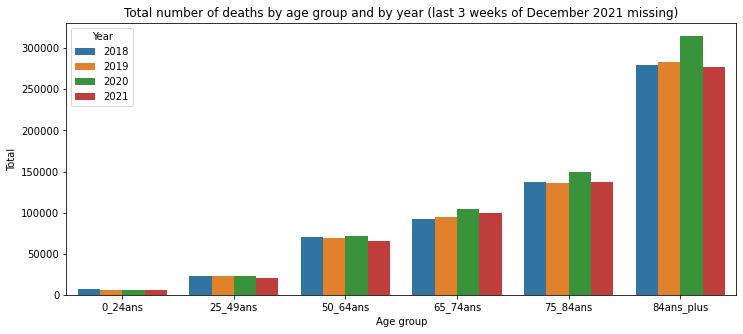

In [53]:
plt.figure(figsize=(12,5));
ax = sns.barplot(data = data_group_year, x = 'Age group', y = 'Total', hue='Year', palette=palette);
ax.set_title("Total number of deaths by age group and by year (last 3 weeks of December 2021 missing)");

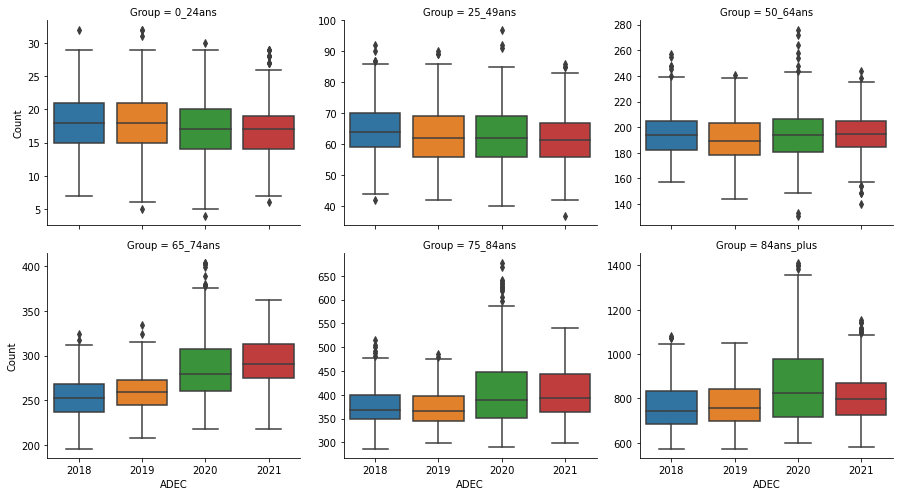

In [76]:
ax = sns.catplot(data = data_group, x = 'ADEC', y = 'Count', col='Group', 
            kind='box', col_wrap=3,  hue = 'ADEC', palette=palette,
            height=3.5, sharey=False, aspect=1.2, dodge = False);

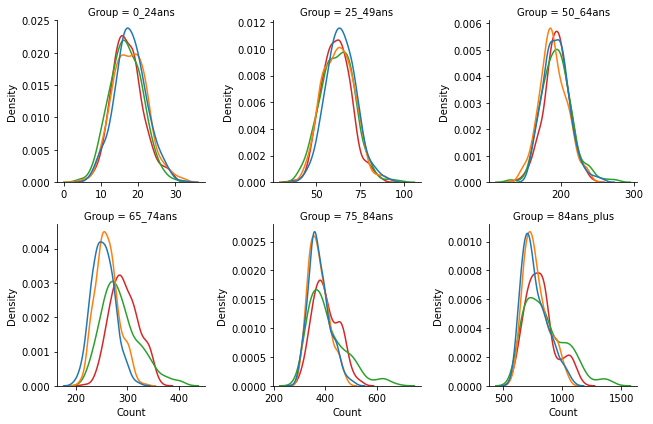

In [92]:
g = sns.FacetGrid(data_group, col='Group',  col_wrap=3, sharex=False, sharey=False);
g.map_dataframe(sns.kdeplot, x="Count",  hue = 'ADEC', palette=palette);
g.add_legend();

In [ ]:
group_list = data_group_year['Age group'].apply('unique')

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [42]:
mod = ols('Total ~ ADEC + Group', data = data_group_year).fit()

In [43]:
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq    df           F        PR(>F)
Group     2.112747e+11   5.0  628.499110  1.170672e-18
ADEC      1.725815e+07   1.0    0.256697  6.189063e-01
Residual  1.142936e+09  17.0         NaN           NaN


In [46]:
#mod.t_test_pairwise('ADEC')

## 0-24 years

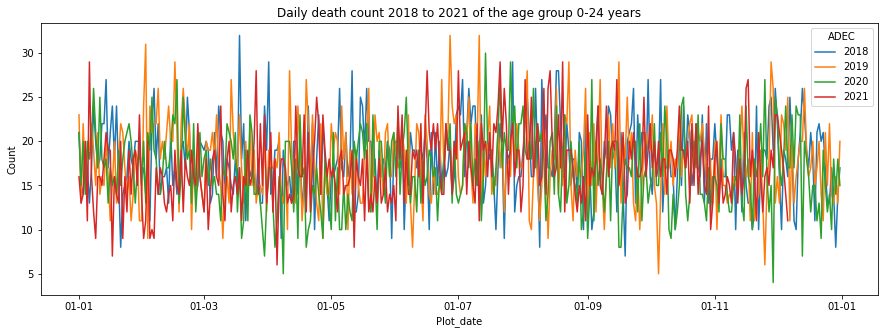

In [55]:
plt.figure(figsize=(15,5));
palette = sns.color_palette("tab10",4)
ax = sns.lineplot(data=data_group[data_group.Group == '0_24ans'], x = 'Plot_date',y = 'Count', 
                  hue='ADEC', palette=palette );
ax.xaxis.set_major_formatter(DateFormatter("%d-%m"));
ax.set_title("Daily death count 2018 to 2021 of the age group 0-24 years");

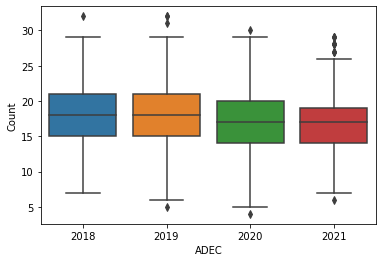

In [99]:
sns.boxplot(data=data_group[data_group.Group == '0_24ans'], x = 'ADEC', y = 'Count');

In [95]:
res = ols('Count ~ ADEC', data = data_group[data_group.Group == '0_24ans']).fit()
aov_table = sm.stats.anova_lm(res, typ=2)
print(aov_table)

                sum_sq      df          F    PR(>F)
ADEC        227.747395     1.0  12.137817  0.000509
Residual  26906.795781  1434.0        NaN       NaN


## 25-49 years

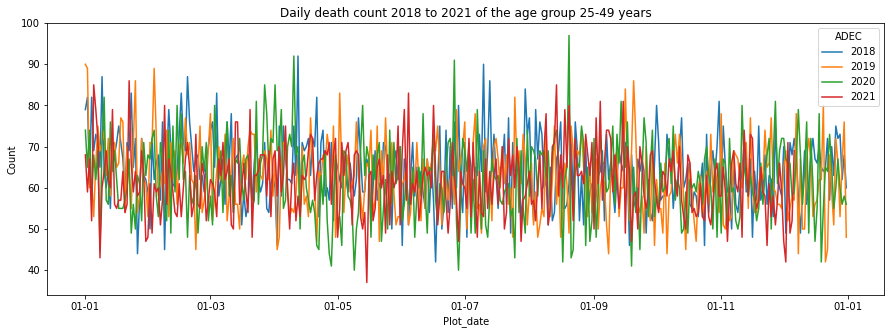

In [96]:
plt.figure(figsize=(15,5));
palette = sns.color_palette("tab10",4)
ax = sns.lineplot(data=data_group[data_group.Group == '25_49ans'], x = 'Plot_date',y = 'Count', hue='ADEC', palette=palette );
ax.xaxis.set_major_formatter(DateFormatter("%d-%m"));
ax.set_title("Daily death count 2018 to 2021 of the age group 25-49 years");

In [489]:
mod = ols('Count ~ ADEC', data = data_group[data_group.Group == '25_49ans']).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq      df          F    PR(>F)
ADEC        1120.676942     1.0  14.593085  0.000139
Residual  110124.122501  1434.0        NaN       NaN


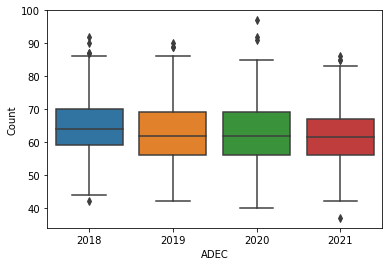

In [98]:
sns.boxplot(data=data_group[data_group.Group == '25_49ans'], x = 'ADEC', y = 'Count');

## 50-64 years

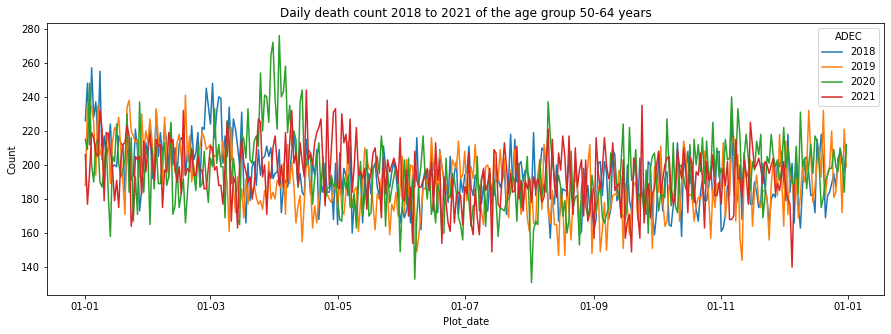

In [97]:
plt.figure(figsize=(15,5));
palette = sns.color_palette("tab10",4)
ax = sns.lineplot(data=data_group[data_group.Group == '50_64ans'], x = 'Plot_date',y = 'Count', hue='ADEC', palette=palette );
ax.xaxis.set_major_formatter(DateFormatter("%d-%m"));
ax.set_title("Daily death count 2018 to 2021 of the age group 50-64 years");

For this age group the pick in mortality during the first confinment in 2020 is visible, but the effect is quite small outside this period

In [105]:
mod = ols('Count ~ ADEC', data = data_group[data_group.Group == '50_64ans']).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq      df         F    PR(>F)
ADEC         720.176901     1.0  2.066178  0.150817
Residual  499828.031317  1434.0       NaN       NaN


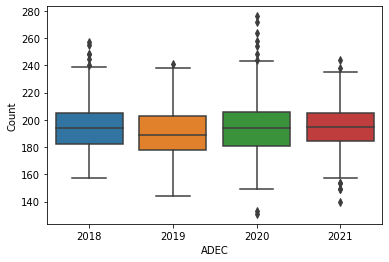

In [106]:
sns.boxplot(data=data_group[data_group.Group == '50_64ans'], x = 'ADEC', y = 'Count');

## 65-74 years

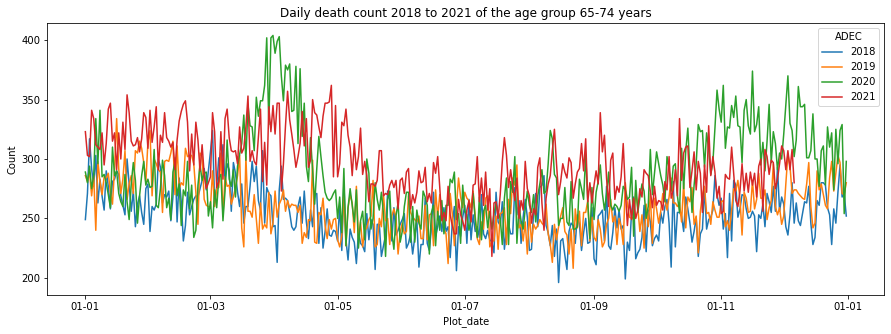

In [102]:
plt.figure(figsize=(15,5));
palette = sns.color_palette("tab10",4)
ax = sns.lineplot(data=data_group[data_group.Group == '65_74ans'], x = 'Plot_date',y = 'Count', hue='ADEC', palette=palette );
ax.xaxis.set_major_formatter(DateFormatter("%d-%m"));
ax.set_title("Daily death count 2018 to 2021 of the age group 65-74 years");

This age group has been affected by overall extra-mortality in 2020 and 2021. If we compare the nov-fecember period 2020 vs 2021 we are probably seeing a reduction in mortality that can be attributed to the vaccination, but the overall mortality is still higher than 2019-2018.


In [103]:
mod = ols('Count ~ ADEC', data = data_group[data_group.Group == '65_74ans']).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df           F        PR(>F)
ADEC      3.982185e+05     1.0  500.994622  2.053543e-95
Residual  1.139823e+06  1434.0         NaN           NaN


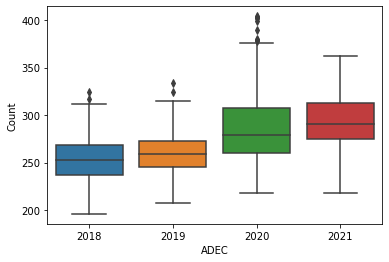

In [104]:
sns.boxplot(data=data_group[data_group.Group == '65_74ans'], x = 'ADEC', y = 'Count');

Fpr this category of age we can see an increase in the daily death rate in 2020 which pursued even more in 2021

## 75-84 years

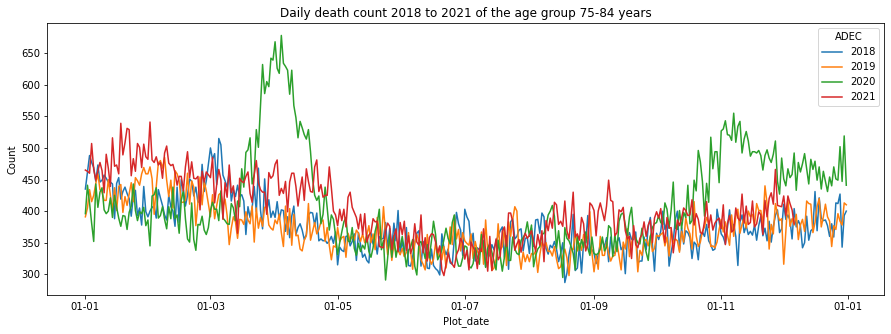

In [111]:
plt.figure(figsize=(15,5));
palette = sns.color_palette("tab10",4)
ax = sns.lineplot(data=data_group[data_group.Group == '75_84ans'], x = 'Plot_date',y = 'Count', hue='ADEC', palette=palette );
ax.xaxis.set_major_formatter(DateFormatter("%d-%m"));
ax.set_title("Daily death count 2018 to 2021 of the age group 75-84 years");

For this age group the overal larger vaccination coverage managed to reduce the mortality end of 2021 at levels similar to pre covid years.

In [108]:
mod = ols('Count ~ ADEC', data = data_group[data_group.Group == '75_84ans']).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df          F        PR(>F)
ADEC      2.388556e+05     1.0  80.556226  8.641033e-19
Residual  4.251924e+06  1434.0        NaN           NaN


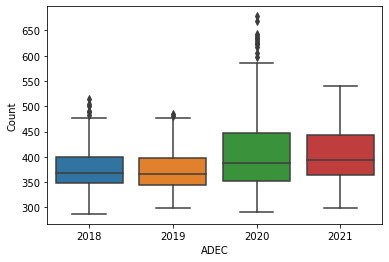

In [109]:
sns.boxplot(data=data_group[data_group.Group == '75_84ans'], x = 'ADEC', y = 'Count');

The daily average in 2021 did not reach the spikes seen in 2020 but it has been on average higher than 2018 and 2019 and similar to the average level of 2020

## 85 years plus

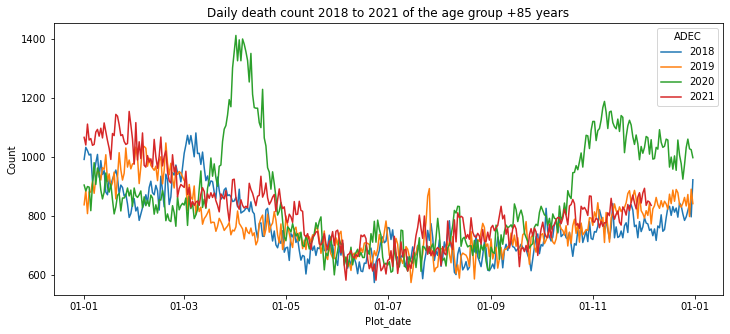

In [110]:
plt.figure(figsize=(12,5));
palette = sns.color_palette("tab10",4)
ax = sns.lineplot(data=data_group[data_group.Group == '84ans_plus'], x = 'Plot_date',y = 'Count', hue='ADEC', palette=palette );
ax.xaxis.set_major_formatter(DateFormatter("%d-%m"));
ax.set_title("Daily death count 2018 to 2021 of the age group +85 years");

For this age group the overal larger vaccination coverage managed to reduce the mortality end of 2021 at levels similar to pre covid years.

In [112]:
mod = ols('Count ~ ADEC', data = data_group[data_group.Group == '84ans_plus']).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df          F        PR(>F)
ADEC      9.495072e+05     1.0  52.567304  6.773808e-13
Residual  2.590191e+07  1434.0        NaN           NaN


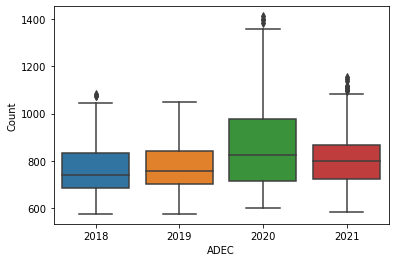

In [113]:
sns.boxplot(data=data_group[data_group.Group == '84ans_plus'], x = 'ADEC', y = 'Count');

# Conclusions and Next Steps
Summarize findings here